<ipython-input-2-872334c3953f>:23: FutureWarning: The provided callable <function mean at 0x7ca0a09d1da0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(


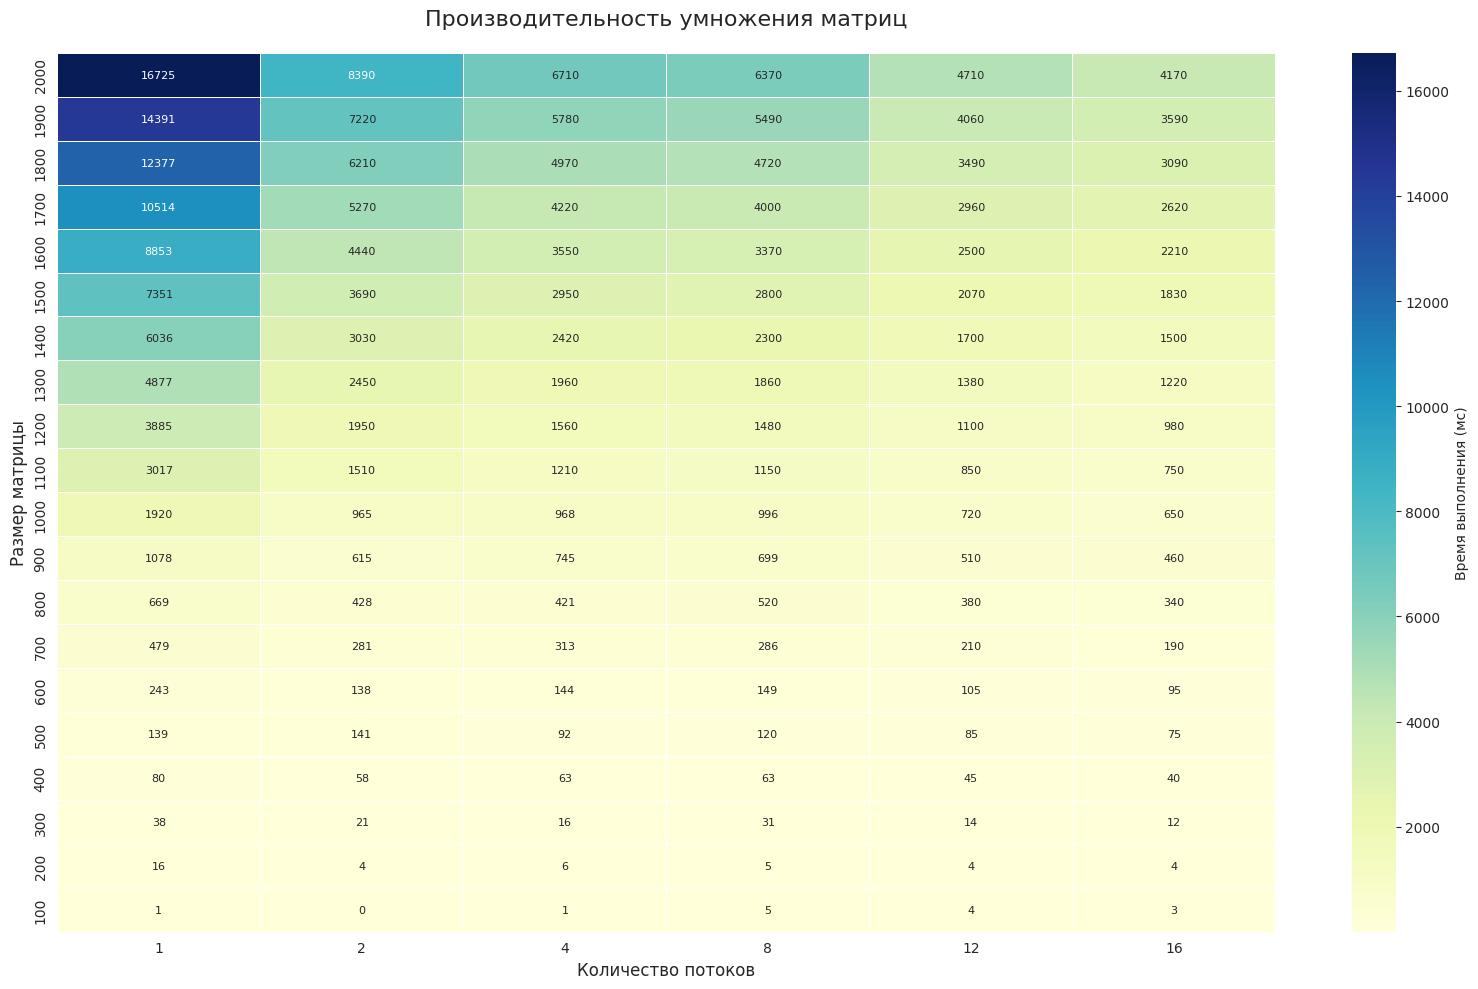


Оптимальные настройки для каждого размера:
2000: 16 потоков (4170 мс)
1900: 16 потоков (3590 мс)
1800: 16 потоков (3090 мс)
1700: 16 потоков (2620 мс)
1600: 16 потоков (2210 мс)
1500: 16 потоков (1830 мс)
1400: 16 потоков (1500 мс)
1300: 16 потоков (1220 мс)
1200: 16 потоков (980 мс)
1100: 16 потоков (750 мс)
1000: 16 потоков (650 мс)
900: 16 потоков (460 мс)
800: 16 потоков (340 мс)
700: 16 потоков (190 мс)
600: 16 потоков (95 мс)
500: 16 потоков (75 мс)
400: 16 потоков (40 мс)
300: 16 потоков (12 мс)
200: 16 потоков (4 мс)
100: 2 потоков (0 мс)

Максимальное ускорение:
Dimension
100     10.000000
200      4.210526
1400     4.024000
1100     4.022667
1500     4.016940


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def display_csv_and_heatmap_analysis(csv_path='matrix_multiplication_results.csv', plot_path='performance_heatmap.png'):
    if not os.path.exists(csv_path):
        print(f"Файл {csv_path} не найден!")
        return

    df = pd.read_csv(csv_path)

    df['Time (ms)'] = df['Multiplication Time (s)'] * 1000
    df = df[df['Time (ms)'] > 0]

    heatmap_data = df.pivot_table(
        index='Dimension',
        columns='Threads',
        values='Time (ms)',
        aggfunc=np.mean
    ).sort_index(ascending=False)

    plt.figure(figsize=(16, 10))
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'DejaVu Sans'

    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': 'Время выполнения (мс)'},
        annot_kws={"size": 8}
    )

    plt.title('Производительность умножения матриц', fontsize=16, pad=20)
    plt.xlabel('Количество потоков', fontsize=12)
    plt.ylabel('Размер матрицы', fontsize=12)
    plt.tight_layout()

    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()


    optimal_threads = heatmap_data.idxmin(axis=1)
    optimal_times = heatmap_data.min(axis=1)

    print("\nОптимальные настройки для каждого размера:")
    for dim in heatmap_data.index:
        print(f"{dim}: {optimal_threads[dim]} потоков ({optimal_times[dim]:.0f} мс)")

    speedup = heatmap_data.max(axis=1) / heatmap_data.min(axis=1)
    print("\nМаксимальное ускорение:")
    print(speedup.sort_values(ascending=False).head(5).to_string())

    efficiency = pd.DataFrame()
    for dim in heatmap_data.index:
        base_time = heatmap_data.loc[dim, 1]
        for thread in heatmap_data.columns:
            if thread == 1:
                efficiency.loc[dim, thread] = 1.0
            else:
                efficiency.loc[dim, thread] = (base_time / heatmap_data.loc[dim, thread]) / thread




display_csv_and_heatmap_analysis()